In [1]:
"""Run an simple experiment locally without using config file.

This file is presented as a very simple entry point to code.
For running any meaningful experiments, we suggest `batch_runner.py` or
`local_runner.py`.
"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys

import numpy as np
import pandas as pd
import plotnine as gg
from plotnine import *

from base.experiment import BaseExperiment
from finite_arm.agent_finite import FiniteBernoulliBanditTS, DriftingFiniteBernoulliBanditTS, FiniteBernoulliBanditLangevin

from finite_arm.env_finite import DriftingFiniteArmedBernoulliBandit, FiniteArmedBernoulliBandit

import warnings
warnings.filterwarnings('ignore')

sys.path.append(os.getcwd())

##############################################################################
# Running a single experiment

probs = [0.1, 0.15, 0.18, 0.05]
n_arm = len(probs) 
n_steps = 150
seed = 0

agent = FiniteBernoulliBanditTS(n_arm)
env = FiniteArmedBernoulliBandit(probs)
experiment = BaseExperiment(
    agent,
    env,
    n_steps=n_steps,
    seed=seed,
    unique_id='example',
    evaluation_pause=25
)

experiment.run_experiment()

##############################################################################
# Simple display / plot of results

display(experiment.results.head(n=16))



,action,cum_regret,expected_reward,instant_regret,observation,pmean0,pmean1,pmean2,pmean3,prob0,prob1,prob2,prob3,stochastic_reward,t,unique_id
0,2,NaN,0.18,NaN,4,0.2,0.2,0.2,0.2,0.266320,0.267712,0.265968,0.2,0,1,example
1,0,NaN,0.10,NaN,4,0.2,0.2,0.2,0.2,0.267744,0.265208,0.267048,0.2,0,2,example
2,1,NaN,0.15,NaN,4,0.2,0.2,0.2,0.2,0.266064,0.268360,0.265576,0.2,1,3,example
3,1,NaN,0.15,NaN,4,0.2,0.2,0.2,0.2,0.266344,0.267760,0.265896,0.2,0,4,example
4,2,NaN,0.18,NaN,4,0.2,0.2,0.2,0.2,0.266584,0.265928,0.267488,0.2,0,5,example
5,0,NaN,0.10,NaN,4,0.2,0.2,0.2,0.2,0.267144,0.266848,0.266008,0.2,1,6,example
6,1,NaN,0.15,NaN,4,0.2,0.2,0.2,0.2,0.265544,0.267336,0.267120,0.2,0,7,example
7,2,NaN,0.18,NaN,4,0.2,0.2,0.2,0.2,0.265392,0.265600,0.269008,0.2,1,8,example
8,1,NaN,0.15,NaN,4,0.2,0.2,0.2,0.2,0.269760,0.265488,0.264752,0.2,0,9,example
9,0,NaN,0.10,NaN,4,0.2,0.2,0.2,0.2,0.266440,0.266672,0.266888,0.2,0,10,example


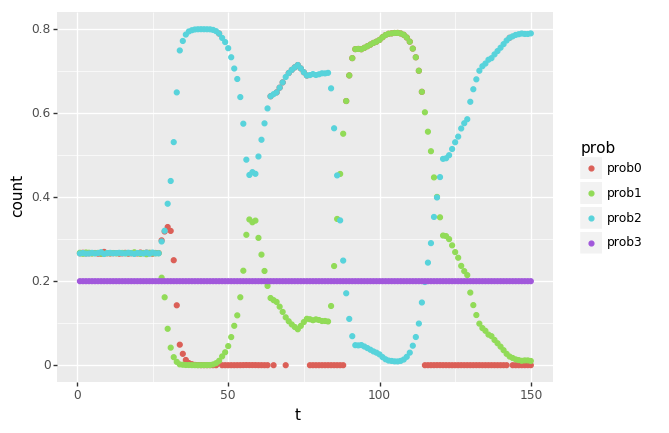

<ggplot: (8729017044435)>

In [2]:
series = ['prob{}'.format(i) for i in range(n_arm)]
df = experiment.results.melt(
    id_vars=['t'],
    value_vars=series,
    var_name='prob',
    value_name='count'
)

probabilities = (ggplot(df) + aes('t', 'count', color='prob', group='prob') + geom_point())
display(probabilities)

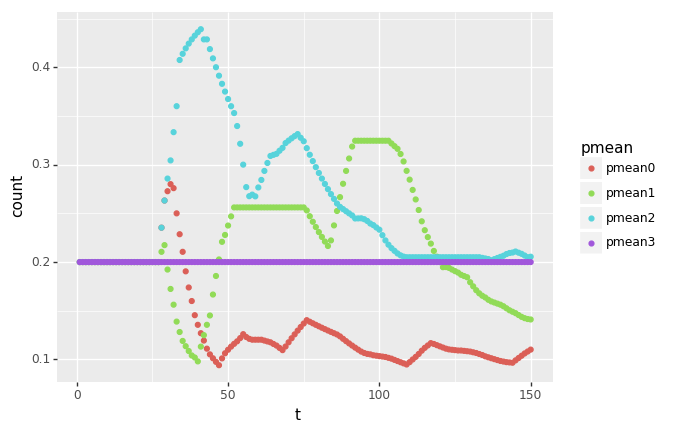

<ggplot: (8729017048952)>

In [3]:
series = ['pmean{}'.format(i) for i in range(n_arm)]
df = experiment.results.melt(
    id_vars=['t'],
    value_vars=series,
    var_name='pmean',
    value_name='count'
)

posterior_means = (ggplot(df) + aes('t', 'count', color='pmean', group='pmean') + geom_point())
display(posterior_means)

In [4]:
display(experiment.results.tail(n=16))

,action,cum_regret,expected_reward,instant_regret,observation,pmean0,pmean1,pmean2,pmean3,prob0,prob1,prob2,prob3,stochastic_reward,t,unique_id
134,0,22.81,0.10,0.08,4,0.103226,0.163636,0.203704,0.2,0.000056,0.081920,0.718024,0.2,0,135,example
135,2,23.05,0.18,0.00,4,0.102236,0.161290,0.203077,0.2,0.000048,0.072880,0.727072,0.2,0,136,example
136,2,23.29,0.18,0.00,4,0.101266,0.159574,0.201835,0.2,0.000072,0.069080,0.730848,0.2,0,137,example
137,2,23.45,0.18,0.00,4,0.100313,0.158451,0.203030,0.2,0.000048,0.060152,0.739800,0.2,0,138,example
138,0,23.53,0.10,0.08,4,0.099379,0.157343,0.204204,0.2,0.000016,0.052296,0.747688,0.2,0,139,example
139,2,23.61,0.18,0.00,4,0.098462,0.156250,0.205357,0.2,0.000032,0.044240,0.755728,0.2,0,140,example
140,2,23.61,0.18,0.00,4,0.097859,0.154639,0.206490,0.2,0.000024,0.035760,0.764216,0.2,0,141,example
141,2,23.61,0.18,0.00,4,0.097264,0.152542,0.208211,0.2,0.000032,0.027120,0.772848,0.2,0,142,example
142,0,23.72,0.10,0.08,4,0.096970,0.150502,0.209302,0.2,0.779376,0.020624,0.779376,0.2,0,143,example
143,2,23.72,0.18,0.00,4,0.096677,0.149007,0.209770,0.2,0.000016,0.017184,0.782800,0.2,0,144,example


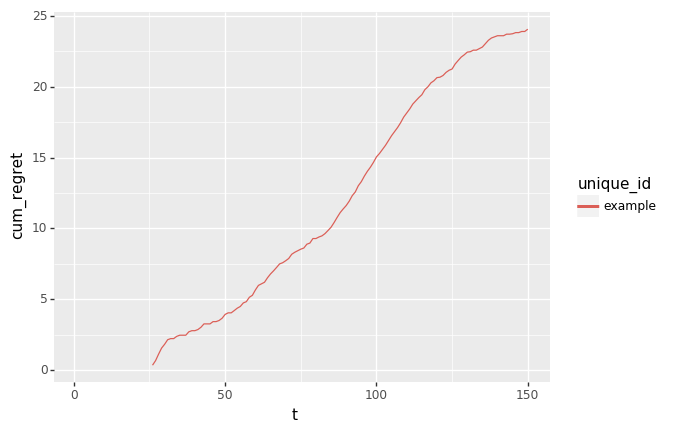

<ggplot: (8729017075222)>


In [6]:
p = (gg.ggplot(experiment.results)
     + gg.aes(x='t', y='cum_regret', colour='unique_id')
     + gg.geom_line())
print(p)

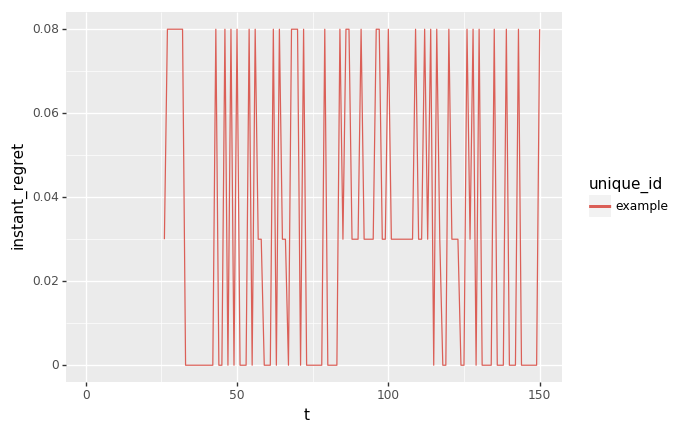

<ggplot: (8729017073749)>


In [5]:
p = (gg.ggplot(experiment.results)
     + gg.aes(x='t', y='instant_regret', colour='unique_id')
     + gg.geom_line())
print(p)